In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

# construct the argument parser and parse the arguments

path = "/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/"

# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 25
BS = 8

# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
imagePaths = list(paths.list_images(path))
data = []
labels = []

# loop over the image paths
for imagePath in imagePaths:
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]
    # load the image, swap color channels, and resize it to be a fixed
    # 224x224 pixels while ignoring aspect ratio
    print(imagePath)
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))

    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)

# convert the data and labels to NumPy arrays while scaling the pixel
# intensities to the range [0, 255]
data = np.array(data) / 255.0
labels = np.array(labels)


[INFO] loading images...
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/normal/NORMAL2-IM-1326-0001.jpeg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/normal/IM-0433-0001.jpeg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/normal/NORMAL2-IM-1019-0001.jpeg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/normal/NORMAL2-IM-0315-0001.jpeg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/normal/NORMAL2-IM-0840-0001.jpeg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/normal/NORMAL2-IM-1288-0001.jpeg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/normal/IM-0156-0001.jpeg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/normal/IM-0270-0001.jpeg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/normal/person378_virus_761.jpeg
/Users/malaudeen/Documents/Inceptez/M

/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/normal/IM-0425-0001.jpeg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/normal/IM-0563-0001.jpeg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/normal/IM-0669-0001.jpeg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/normal/NORMAL2-IM-0499-0001.jpeg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/normal/IM-0482-0001.jpeg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/normal/IM-0467-0001.jpeg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/normal/IM-0301-0001.jpeg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/normal/person1599_virus_2776.jpeg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/normal/NORMAL2-IM-1287-0001.jpeg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/normal/NOR

/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/normal/IM-0619-0001.jpeg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/normal/NORMAL2-IM-1103-0001-0001.jpeg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/normal/NORMAL2-IM-0529-0001.jpeg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/normal/NORMAL2-IM-0765-0001.jpeg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/normal/IM-0240-0001.jpeg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/covid/9fdd3c3032296fd04d2cad5d9070d4_jumbo.jpeg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/covid/16669_3_1.jpeg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/covid/16663_1_1.jpg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/covid/covid-19-pneumonia-22-day2-pa.png
/Users/malaudeen/Documents/Inceptez/ML-Deployement/

/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/covid/ciaa199.pdf-001-a.png
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/covid/covid-19-pneumonia-20.jpg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/covid/16664_1_1.jpg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/covid/covid-19-infection-exclusive-gastrointestinal-symptoms-pa.png
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/covid/1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/covid/88de9d8c39e946abd495b37cd07d89e5-2ee6-0.jpg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg
/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/

In [2]:
labels

array(['normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'norm

In [3]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)


In [4]:
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [5]:
labels.shape

(309, 2)

In [6]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20,  random_state=42)

In [14]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

Using TensorFlow backend.


### 1. Creating model
- Creating a model is same with MLP (Sequential)

In [26]:
model = Sequential()

### 2. Convolutional Layer
- In general, 2D convolutional layer is used for image processing
    - Size of filter (designated by 'kernel_size' parameter) defines **width and height of receptive field **
    - Number of filters (designated by 'filters' parameter) is equal to **depth of the next layer**
    - Strides (designated by 'strides' parameter) is** how far a filter makes change in its position** for each move
    - Image can be **zero-padded** in order to prevent getting too small (designated by 'padding' parameter)
- Doc: https://keras.io/layers/convolutional/
<img src="http://cs231n.github.io/assets/cnn/depthcol.jpeg" style="width: 400px"/>

In [27]:
input_shape = (trainX.shape[1], trainX.shape[2], trainX.shape[3])

In [28]:
input_shape

(224, 224, 3)

In [29]:
# convolution layer
model.add(Conv2D(input_shape = (trainX.shape[1], trainX.shape[2], trainX.shape[3]), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))


### 3. Activation Layer
- Identical to the activation layers in MLP
- In general, relu is used as well
- Doc: http://cs231n.github.io/assets/cnn/depthcol.jpeg

In [30]:
model.add(Activation('relu'))

### 4. Pooling layer
- In general, max pooling method is used
- Reduces number of parameters
- Doc: https://keras.io/layers/pooling/
<img src="http://cs231n.github.io/assets/cnn/maxpool.jpeg" style="width: 600px"/>

In [31]:
model.add(MaxPooling2D(pool_size = (2,2)))

### 5. Dense (fully connected layer)
- Convolutional & pooling layers can be connected to dense layers
- Sometimes, dense layers can be omitted
- Doc: https://keras.io/layers/core/

In [32]:
# prior layer should be flattend to be connected to dense layers
model.add(Flatten())

In [33]:
# dense layer with 50 neurons
model.add(Dense(50, activation = 'relu'))

In [34]:
# final layer with 10 neurons to classify the instances
model.add(Dense(2, activation = 'softmax'))

### 6. Model compile & train
- Identical to compiling MLP models

In [35]:
adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [36]:
history = model.fit(trainX, trainY, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

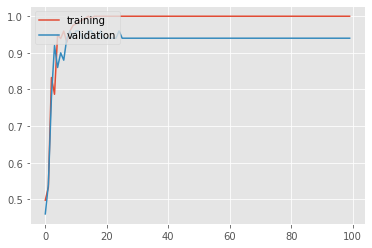

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [39]:
results = model.evaluate(testX, testY)

62/62 [==============================] - 0s 2ms/step


In [48]:
test_pred = np.argmax(model.predict(testX), axis=1)

In [40]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9838709831237793


In [54]:
confusion_matrix(test_pred, np.argmax(testY, axis=1))

array([[27,  0],
       [ 1, 34]])

Even simple CNN model shows fine performance of **98% **test accuracy

# Advanced Convolutional Neural Networks (CNN) - 1
- Objective: try different structures of CNNs
- Note: examples are performed on **i5 7600 + gtx 1060 6GB **

## Deeper Networks
- It is one of definite trends that CNN models submitted to ILSVRC are getting deeper and deeper
<img src="https://cdn-images-1.medium.com/max/756/1*Io-I-fOM0jGftDb_nne4KQ.png" style="width: 600px"/>

<br>
- Deeper networks are able to learn more "abstract" representations by comprising more operations and nonlinearities 
- However, they are difficult and costly to train and prone to overfitting

<img src="http://cs231n.github.io/assets/cnnvis/filt1.jpeg" style="width: 400px"/>

In [55]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

## 0. Basic CNN model
- Basic CNN similar to what we made before
- One convolutional & pooling layer

In [56]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [63]:
def basic_cnn():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (trainX.shape[1], trainX.shape[2], trainX.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu'))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(2, activation = 'softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [64]:
model = basic_cnn()

In [65]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 50)      1400      
_________________________________________________________________
activation_4 (Activation)    (None, 224, 224, 50)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 50)      0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 627200)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                31360050  
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 102       
Total params: 31,361,552
Trainable params: 31,361,552
Non-trainable params: 0
__________________________________________

In [66]:
%%time
history = model.fit(trainX, trainY, batch_size = 50, validation_split = 0.2, epochs = 10, verbose = 1)

Train on 197 samples, validate on 50 samples
Epoch 1/10
197/197 [==============================] - 6s 31ms/step - loss: 16.7226 - accuracy: 0.5888 - val_loss: 1.4637 - val_accuracy: 0.6600
Epoch 2/10
197/197 [==============================] - 4s 18ms/step - loss: 4.9789 - accuracy: 0.7056 - val_loss: 1.3726 - val_accuracy: 0.8200
Epoch 3/10
197/197 [==============================] - 4s 18ms/step - loss: 2.7059 - accuracy: 0.7513 - val_loss: 0.2743 - val_accuracy: 0.9600
Epoch 4/10
197/197 [==============================] - 4s 19ms/step - loss: 0.8631 - accuracy: 0.9137 - val_loss: 1.2729 - val_accuracy: 0.8400
Epoch 5/10
197/197 [==============================] - 4s 20ms/step - loss: 0.4090 - accuracy: 0.9137 - val_loss: 0.1779 - val_accuracy: 0.9600
Epoch 6/10
197/197 [==============================] - 4s 18ms/step - loss: 0.1424 - accuracy: 0.9492 - val_loss: 0.1209 - val_accuracy: 0.9600
Epoch 7/10
197/197 [==============================] - 4s 18ms/step - loss: 0.0896 - accuracy: 0.

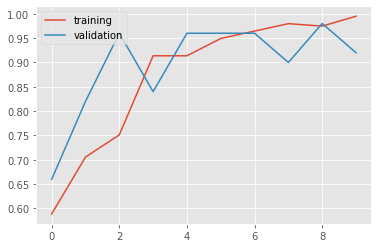

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [69]:
results = model.evaluate(testX, testY)

62/62 [==============================] - 0s 6ms/step


In [70]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9516128897666931


In [71]:
test_pred = np.argmax(model.predict(testX), axis=1)

confusion_matrix(test_pred, np.argmax(testY, axis=1))

array([[27,  2],
       [ 1, 32]])

## 1. Deep CNN - 1
- Deeper network with 6 convolutional layers and 3 pooling layers
- Note that two (3x3) convolutional layers are stacked
    - It is equivalent to using one (5X5) convolutional layer, but with fewer parameters
    - Similar to the structured used in VGGnet

<img src="http://www.hirokatsukataoka.net/research/cnnfeatureevaluation/cnnarchitecture.jpg" style="width: 600px"/>

In [74]:
def deep_cnn():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (trainX.shape[1], trainX.shape[2], trainX.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu'))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(2, activation = 'softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [75]:
model = deep_cnn()

In [76]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 224, 224, 50)      1400      
_________________________________________________________________
activation_5 (Activation)    (None, 224, 224, 50)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 224, 224, 50)      22550     
_________________________________________________________________
activation_6 (Activation)    (None, 224, 224, 50)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 50)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 50)      22550     
_________________________________________________________________
activation_7 (Activation)    (None, 112, 112, 50)     

In [77]:
%%time
history = model.fit(trainX, trainY, batch_size = 50, validation_split = 0.2, epochs = 10, verbose = 2)

Train on 197 samples, validate on 50 samples
Epoch 1/10
 - 18s - loss: 0.6850 - accuracy: 0.6802 - val_loss: 0.6362 - val_accuracy: 0.5400
Epoch 2/10
 - 17s - loss: 0.5454 - accuracy: 0.6345 - val_loss: 0.3315 - val_accuracy: 0.8800
Epoch 3/10
 - 18s - loss: 0.2441 - accuracy: 0.8985 - val_loss: 0.3103 - val_accuracy: 0.8600
Epoch 4/10
 - 18s - loss: 0.2616 - accuracy: 0.9086 - val_loss: 0.1170 - val_accuracy: 0.9400
Epoch 5/10
 - 21s - loss: 0.2533 - accuracy: 0.9289 - val_loss: 0.2180 - val_accuracy: 0.8800
Epoch 6/10
 - 23s - loss: 0.1386 - accuracy: 0.9492 - val_loss: 0.1711 - val_accuracy: 0.9200
Epoch 7/10
 - 22s - loss: 0.1236 - accuracy: 0.9645 - val_loss: 0.1108 - val_accuracy: 0.9600
Epoch 8/10
 - 23s - loss: 0.0726 - accuracy: 0.9645 - val_loss: 0.0898 - val_accuracy: 0.9600
Epoch 9/10
 - 24s - loss: 0.0400 - accuracy: 0.9848 - val_loss: 0.1541 - val_accuracy: 0.9600
Epoch 10/10
 - 21s - loss: 0.0444 - accuracy: 0.9797 - val_loss: 0.1401 - val_accuracy: 0.9600
CPU times: use

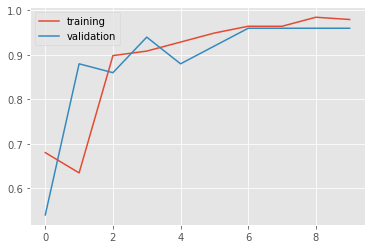

In [78]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training is rather unstable; accuracy falling down after around 80 epochs

In [79]:
results = model.evaluate(testX, testY)

62/62 [==============================] - 1s 18ms/step


In [80]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9838709831237793


In [81]:
test_pred = np.argmax(model.predict(testX), axis=1)

confusion_matrix(test_pred, np.argmax(testY, axis=1))

array([[27,  0],
       [ 1, 34]])

## 2. Deep CNN - 2
- Measures used to ameliorate the performance of MLPs are employed
    - Weight Initialization
    - Batch Normalization
    - Dropout

In [84]:
from keras.layers import BatchNormalization, Dropout

In [85]:
def deep_cnn_advanced():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (trainX.shape[1], trainX.shape[2], trainX.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(2, activation = 'softmax', kernel_initializer='he_normal'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [86]:
model = deep_cnn_advanced()

In [87]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 224, 224, 50)      1400      
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 50)      200       
_________________________________________________________________
activation_11 (Activation)   (None, 224, 224, 50)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 224, 224, 50)      22550     
_________________________________________________________________
batch_normalization_2 (Batch (None, 224, 224, 50)      200       
_________________________________________________________________
activation_12 (Activation)   (None, 224, 224, 50)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 112, 112, 50)     

In [89]:
%%time
history = model.fit(trainX, trainY, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 1)

Train on 197 samples, validate on 50 samples
Epoch 1/100
197/197 [==============================] - 41s 211ms/step - loss: 7.7117 - accuracy: 0.6193 - val_loss: 12.3412 - val_accuracy: 0.5400
Epoch 2/100
197/197 [==============================] - 35s 180ms/step - loss: 2.5575 - accuracy: 0.8426 - val_loss: 36.3183 - val_accuracy: 0.5400
Epoch 3/100
197/197 [==============================] - 35s 179ms/step - loss: 0.4927 - accuracy: 0.9442 - val_loss: 35.5696 - val_accuracy: 0.4200
Epoch 4/100
197/197 [==============================] - 37s 189ms/step - loss: 0.3590 - accuracy: 0.9442 - val_loss: 47.7165 - val_accuracy: 0.4400
Epoch 5/100
197/197 [==============================] - 41s 206ms/step - loss: 0.0519 - accuracy: 0.9797 - val_loss: 40.2094 - val_accuracy: 0.4400
Epoch 6/100
197/197 [==============================] - 40s 203ms/step - loss: 0.2012 - accuracy: 0.9594 - val_loss: 31.9427 - val_accuracy: 0.4600
Epoch 7/100
197/197 [==============================] - 40s 203ms/step - l

Epoch 56/100
197/197 [==============================] - 46s 233ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.1903 - val_accuracy: 0.9000
Epoch 57/100
197/197 [==============================] - 42s 211ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.1829 - val_accuracy: 0.9200
Epoch 58/100
197/197 [==============================] - 52s 266ms/step - loss: 5.1171e-04 - accuracy: 1.0000 - val_loss: 0.1769 - val_accuracy: 0.9200
Epoch 59/100
197/197 [==============================] - 45s 227ms/step - loss: 2.7123e-04 - accuracy: 1.0000 - val_loss: 0.1718 - val_accuracy: 0.9400
Epoch 60/100
197/197 [==============================] - 40s 203ms/step - loss: 1.1053e-04 - accuracy: 1.0000 - val_loss: 0.1676 - val_accuracy: 0.9400
Epoch 61/100
197/197 [==============================] - 44s 223ms/step - loss: 0.0106 - accuracy: 0.9949 - val_loss: 0.1588 - val_accuracy: 0.9400
Epoch 62/100
197/197 [==============================] - 41s 206ms/step - loss: 0.0036 - accuracy: 1.0000 -

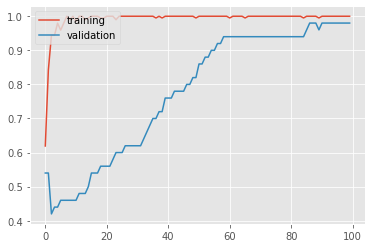

In [90]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Stable and comparable result is obtained

In [91]:
results = model.evaluate(testX, testY)

62/62 [==============================] - 3s 41ms/step


In [92]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9677419066429138


In [93]:
test_pred = np.argmax(model.predict(testX), axis=1)

confusion_matrix(test_pred, np.argmax(testY, axis=1))

array([[28,  2],
       [ 0, 32]])

In [7]:
# initialize the training data augmentation object
trainAug = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

# load the VGG16 network, ensuring the head FC layer sets are left
# off
baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] compiling model...
[INFO] training head...
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 30 steps, validate on 62 samples
Epoch 1/25
30/30 [==============================] - 34s 1s/step - loss: 0.7027 - accuracy: 0.6360 - val_loss: 0.4424 - val_accuracy: 0.8214
Epoch 2/25
30/30 [==============================] - 43s 1s/step - loss: 0.4809 - accuracy: 0.7950 - val_loss: 0.3350 - val_accuracy: 0.8750
Epoch 3/25
30/30 [==============================] - 38s 1s/step - loss: 0.3964 - accuracy: 0.8661 - val_loss: 0.2692 - val_accuracy: 0.9107
Epoch 4/25
30/30 [==============================] - 41s 1s/step - loss: 0.2850 - accuracy: 0.9289 - val_loss: 0.2069 - val_accuracy: 0.9643
Epoch 5/25
30/30 [==============================] - 47s 2s/step - loss: 0.2603 - accuracy: 0.9038 - val_loss: 0.1765 - val_accuracy: 0.9464
Epoch 6/25
30/30 [==============================] - 36s 1s/step - loss: 0.2319 - accuracy: 0.9038 - val_lo

In [11]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(trainX, batch_size=BS)


# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(trainY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(trainY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))



[INFO] evaluating network...
              precision    recall  f1-score   support

       covid       0.99      0.99      0.99       115
      normal       0.99      0.99      0.99       132

    accuracy                           0.99       247
   macro avg       0.99      0.99      0.99       247
weighted avg       0.99      0.99      0.99       247

[[114   1]
 [  1 131]]
acc: 0.9919
sensitivity: 0.9913
specificity: 0.9924


[INFO] saving COVID-19 detector model...


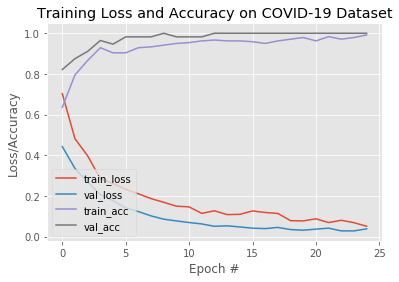

In [12]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot")

# serialize the model to disk
print("[INFO] saving COVID-19 detector model...")
model.save("model_VGG", save_format="h5")

# Load the saved model

In [96]:
#Image utils
from tensorflow import keras
import cv2

# Model saved with Keras model.save()
MODEL_PATH = 'model_VGG'
# Load your trained model
loadedModel = keras.models.load_model(MODEL_PATH)


In [97]:
testDt = "/Users/malaudeen/Documents/Inceptez/ML-Deployement/keras-covid-19/dataset/normal/person925_virus_1582.jpeg"
image = cv2.imread(testDt)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
image_con = image.reshape((1,224, 224,3))
image_con = np.array(image_con) / 255.0
predIdxs = loadedModel.predict(image_con, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
kv = {0:"Covid Positive",1:"Covid Negative"}
l = dict((k,v) for k,v in kv.items())
prednames = l[predIdxs[0]]
print(prednames)

Covid Negative
